# **Naive Bayes**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import klib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df

,sepal.length,sepal.width,petal.length,petal.width,quality,variety
0,5.1,3.5,1.4,0.2,Yes,Setosa
1,4.9,3.0,1.4,0.2,Yes,Setosa
2,4.7,3.2,1.3,0.2,Yes,Setosa
3,4.6,3.1,1.5,0.2,Yes,Setosa
4,5.0,3.6,1.4,0.2,Yes,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Absent,Virginica
146,6.3,2.5,5.0,1.9,Absent,Virginica
147,6.5,3.0,5.2,2.0,Absent,Virginica
148,6.2,3.4,5.4,2.3,Absent,Virginica


## **Data Analysis**

In [4]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,quality,variety
0,5.1,3.5,1.4,0.2,Yes,Setosa
1,4.9,3.0,1.4,0.2,Yes,Setosa
2,4.7,3.2,1.3,0.2,Yes,Setosa
3,4.6,3.1,1.5,0.2,Yes,Setosa
4,5.0,3.6,1.4,0.2,Yes,Setosa


In [5]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,quality,variety
145,6.7,3.0,5.2,2.3,Absent,Virginica
146,6.3,2.5,5.0,1.9,Absent,Virginica
147,6.5,3.0,5.2,2.0,Absent,Virginica
148,6.2,3.4,5.4,2.3,Absent,Virginica
149,5.9,3.0,5.1,1.8,Absent,Virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  145 non-null    float64
 1   sepal.width   137 non-null    float64
 2   petal.length  144 non-null    float64
 3   petal.width   150 non-null    float64
 4   quality       150 non-null    object 
 5   variety       150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [7]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,145.000000,137.000000,144.000000,150.000000
mean,5.858621,3.046715,3.797917,1.199333
std,0.828032,0.433530,1.769733,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
quality          object
variety          object
dtype: object

In [9]:
list_item = []
for col in df.columns:
    list_item.append([col,                                    # Feature
                      df[col].dtype,                          # Data_type
                      df[col].isna().sum(),                   # Null_num
                      100*df[col].isna().sum()/len(df[col]),  # Null_pct
                      df[col].unique(),                       # Unique_num
                      df[col].unique()[:4]])                  # Unique_sample
desc_df = pd.DataFrame(data=list_item, columns='Feature Data_type Null_num Null_pct Unique_num Unique_sample'.split()) 
desc_df

,Feature,Data_type,Null_num,Null_pct,Unique_num,Unique_sample
0,sepal.length,float64,5,3.333333,"[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, nan, 4.4, 4.8, ...","[5.1, 4.9, 4.7, 4.6]"
1,sepal.width,float64,13,8.666667,"[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, nan, 3.7, ...","[3.5, 3.0, 3.2, 3.1]"
2,petal.length,float64,6,4.000000,"[1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...","[1.4, 1.3, 1.5, 1.7]"
3,petal.width,float64,0,0.000000,"[0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...","[0.2, 0.4, 0.3, 0.1]"
4,quality,object,0,0.000000,"[Yes, No, Absent]","[Yes, No, Absent]"
5,variety,object,0,0.000000,"[Setosa, Versicolor, Virginica]","[Setosa, Versicolor, Virginica]"


## **Data Preprocessing**

### Missing Value

In [10]:
df.isna().sum()

sepal.length     5
sepal.width     13
petal.length     6
petal.width      0
quality          0
variety          0
dtype: int64

In [11]:
# Impute menggunakan nilai median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df.iloc[:, :-2] = imputer.fit_transform(df.iloc[:, :-2])

In [12]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
quality         0
variety         0
dtype: int64

In [13]:
df

,sepal.length,sepal.width,petal.length,petal.width,quality,variety
0,5.1,3.5,1.4,0.2,Yes,Setosa
1,4.9,3.0,1.4,0.2,Yes,Setosa
2,4.7,3.2,1.3,0.2,Yes,Setosa
3,4.6,3.1,1.5,0.2,Yes,Setosa
4,5.0,3.6,1.4,0.2,Yes,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Absent,Virginica
146,6.3,2.5,5.0,1.9,Absent,Virginica
147,6.5,3.0,5.2,2.0,Absent,Virginica
148,6.2,3.4,5.4,2.3,Absent,Virginica


### Label Variety Encoding

In [14]:
# creating instance of labelencoder
label_encoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['variety'] = label_encoder.fit_transform(df['variety'])

In [15]:
df

,sepal.length,sepal.width,petal.length,petal.width,quality,variety
0,5.1,3.5,1.4,0.2,Yes,0
1,4.9,3.0,1.4,0.2,Yes,0
2,4.7,3.2,1.3,0.2,Yes,0
3,4.6,3.1,1.5,0.2,Yes,0
4,5.0,3.6,1.4,0.2,Yes,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Absent,2
146,6.3,2.5,5.0,1.9,Absent,2
147,6.5,3.0,5.2,2.0,Absent,2
148,6.2,3.4,5.4,2.3,Absent,2


### Divide into independent and dependent variables

In [16]:
X = df.iloc[:, :-1].values
y = df['variety']

### Handling categorical features

In [17]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X_onehot = ct.fit_transform(X)

In [18]:
X_onehot

array([[0.0, 0.0, 1.0, ..., 3.5, 1.4, 0.2],
       [0.0, 0.0, 1.0, ..., 3.0, 1.4, 0.2],
       [0.0, 0.0, 1.0, ..., 3.2, 1.3, 0.2],
       ...,
       [1.0, 0.0, 0.0, ..., 3.0, 5.2, 2.0],
       [1.0, 0.0, 0.0, ..., 3.4, 5.4, 2.3],
       [1.0, 0.0, 0.0, ..., 3.0, 5.1, 1.8]], dtype=object)

In [19]:
X = df.iloc[:, :-1]
y = df['variety']

In [20]:
X_dummies = pd.get_dummies(X)

In [21]:
X_dummies

,sepal.length,sepal.width,petal.length,petal.width,quality_Absent,quality_No,quality_Yes
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,0,0
146,6.3,2.5,5.0,1.9,1,0,0
147,6.5,3.0,5.2,2.0,1,0,0
148,6.2,3.4,5.4,2.3,1,0,0


### Analisis Korelasi Fitur

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

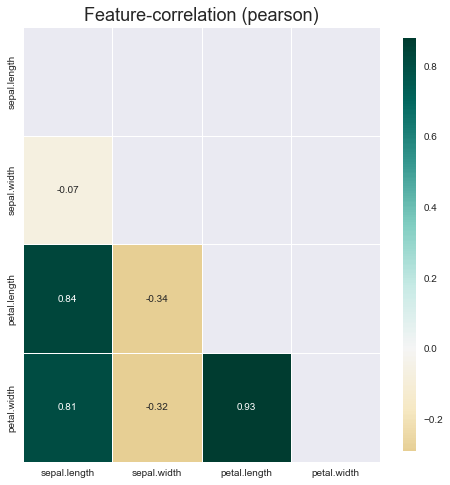

In [22]:
# Korelasi pada data yang belum dilakukan categorical encoding
klib.corr_plot(X, annot=True, figsize=(8,8))

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

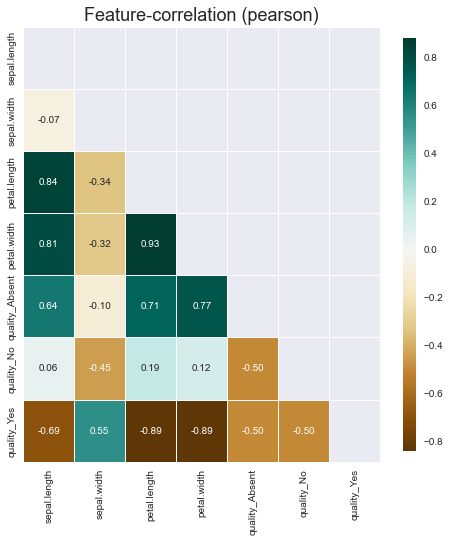

In [23]:
# Korelasi pada data yang telah dilakukan categorical encoding (menggunakan data pandas dummies)
klib.corr_plot(X_dummies, annot=True, figsize=(8,8))

### Outlier Detection

In [24]:
iso = IsolationForest(contamination=0.1)
iso_yhat = iso.fit_predict(X_onehot)

In [25]:
mask = iso_yhat != -1
X_clean, y_clean = X_onehot[mask, :], y[mask]

In [26]:
print('Shape sebelum dan sesudah pendeteksian outlier pada data X dan y\n')
print(f'X Before : {X_onehot.shape}')
print(f'X After  : {X_clean.shape}\n')
print(f'y Before : {y.shape}')
print(f'y After  : {y_clean.shape}')

Shape sebelum dan sesudah pendeteksian outlier pada data X dan y

X Before : (150, 7)
X After  : (135, 7)

y Before : (150,)
y After  : (135,)


### Train Test Split

In [27]:
# Train test split untuk data sebelum outlier detection
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.3, random_state=42)

In [28]:
# Train test split untuk data sesudah outlier detection
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

In [29]:
X_train.shape

(105, 7)

In [30]:
X_train_clean.shape

(94, 7)

## **Modelling - Naive Bayes**

In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'Accuracy of model is {metrics.accuracy_score(y_test, y_pred)}')

Accuracy of model is 1.0


In [57]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
cm = confusion_matrix(y_test, y_pred)

print(f'Precision = {precision_score(y_test, y_pred, average=None)}')
print(f'Recall = {recall_score(y_test, y_pred, average=None)}')

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy

Precision = [1. 1. 1.]
Recall = [1. 1. 1.]


In [58]:
target_names = ['1', '2', '3']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<AxesSubplot:>

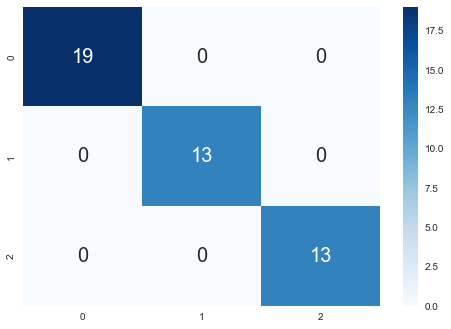

In [59]:
sns.heatmap(cm, annot=True, cmap='Blues', annot_kws={'size': 20})